# Detailed Comparison of Simulated and Experimental Contact Maps

Compare the overall correlation, correlation near the main diagonal, and correlation away from the diagonal for two contact maps.

### Import Modules

In [1]:
import os
import sys

import skimage
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Specify Simulations

In [2]:
output_dir = "/scratch/users/jwakim/chromo_two_mark_phase_transition/output"
sim_ind_1 = 33
sim_ind_2 = 35
ref_cmap_path = "/scratch/users/jwakim/chromo_two_mark_phase_transition/output/Rao_data/chr_16_log_contacts.csv"
sim_cmap_file_name = "log_detailed_contact_map_25_cutoff.csv"

### Load Reference Contact Map

In [3]:
ref_cmap = pd.read_csv(ref_cmap_path, header=None).to_numpy()

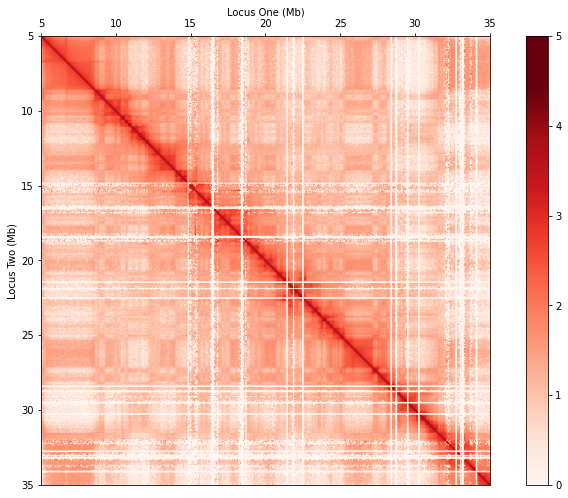

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

### Load Simulated Contact Maps

In [5]:
cmap_1 = pd.read_csv(f"{output_dir}/sim_{sim_ind_1}/{sim_cmap_file_name}", header=None, sep=" ").to_numpy()
cmap_2 = pd.read_csv(f"{output_dir}/sim_{sim_ind_2}/{sim_cmap_file_name}", header=None, sep=" ").to_numpy()

# Isolate genomic region of interest
max_ind = len(cmap_1) - 1
lower_bound = int(round((5 / 90) * max_ind))
upper_bound = int(round((35 / 90) * max_ind))
cmap_1 = cmap_1[lower_bound:upper_bound, lower_bound:upper_bound]

max_ind = len(cmap_2) - 1
lower_bound = int(round((5 / 90) * max_ind))
upper_bound = int(round((35 / 90) * max_ind))
cmap_2 = cmap_2[lower_bound:upper_bound, lower_bound:upper_bound]

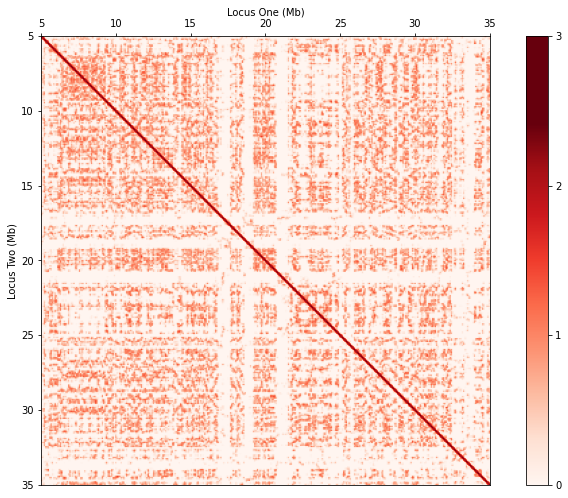

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(cmap_1, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(cmap_1))+1)
boundaries = np.linspace(0, np.ceil(np.max(cmap_1)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

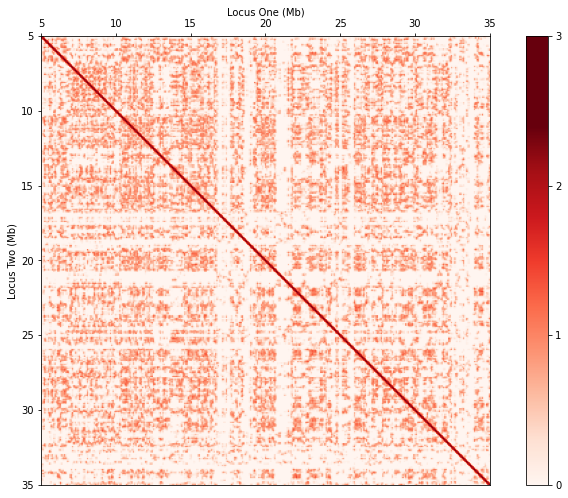

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(cmap_2, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(cmap_2))+1)
boundaries = np.linspace(0, np.ceil(np.max(cmap_2)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

### Resize the Contact Maps

In [8]:
# For comparison between references and simulations
ref_cmap_1 = skimage.transform.resize(
    ref_cmap, (cmap_1.shape[0], cmap_1.shape[1]), anti_aliasing=True
)
ref_cmap_2 = skimage.transform.resize(
    ref_cmap, (cmap_2.shape[0], cmap_2.shape[1]), anti_aliasing=True
)

# For comparison between coarse-grained and refined simulations
cmap_2_cg = skimage.transform.resize(
    cmap_2, (cmap_1.shape[0], cmap_1.shape[1]), anti_aliasing=True
)

### Plot Overlayed Contact Maps

#### Coarse-grained Simulation

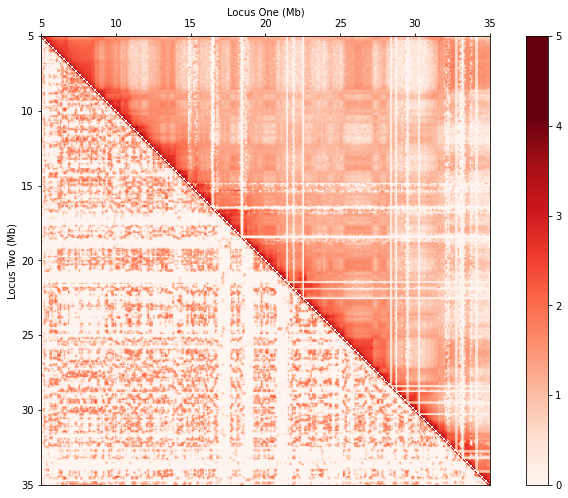

In [9]:
# Express the reference contact map as an upper-diagonal matrix
ref_cmap_upper_1 = np.triu(ref_cmap_1)
ref_cmap_plot_1 = ref_cmap_upper_1.copy()
for i in range(len(ref_cmap_plot_1)):
    for j in range(i):
        ref_cmap_plot_1[i, j] = np.nan
ref_cmap_max_intensity = np.max(ref_cmap_upper_1)

# Express the simulated contact map as lower diagonal matrices
cmap_1_lower = np.tril(cmap_1)
cmap_1_lower_scaled = cmap_1_lower * (ref_cmap_max_intensity / np.max(cmap_1_lower))
cmap_1_plot = cmap_1_lower_scaled.copy()
for i in range(len(cmap_1_plot)):
    for j in range(i):
        cmap_1_plot[j, i] = np.nan

# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_plot_1, cmap="Reds", extent=extents)
im = ax.imshow(cmap_1_plot, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_upper_1))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_upper_1)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

#### Refined Simulation

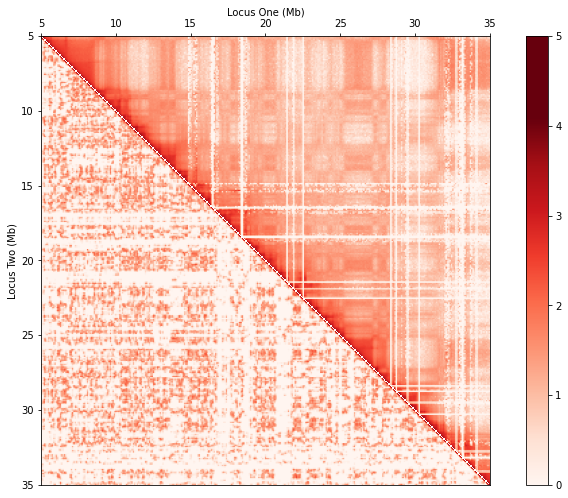

In [10]:
# Express the reference contact map as an upper-diagonal matrix
ref_cmap_upper_2 = np.triu(ref_cmap_2)
ref_cmap_plot_2 = ref_cmap_upper_2.copy()
for i in range(len(ref_cmap_plot_2)):
    for j in range(i):
        ref_cmap_plot_2[i, j] = np.nan
ref_cmap_max_intensity = np.max(ref_cmap_upper_2)

# Express the simulated contact map as lower diagonal matrices
cmap_2_lower = np.tril(cmap_2)
cmap_2_lower_scaled = cmap_2_lower * (ref_cmap_max_intensity / np.max(cmap_2_lower))
cmap_2_plot = cmap_2_lower_scaled.copy()
for i in range(len(cmap_2_plot)):
    for j in range(i):
        cmap_2_plot[j, i] = np.nan

# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_plot_2, cmap="Reds", extent=extents)
im = ax.imshow(cmap_2_plot, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_upper_2))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_upper_2)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

### Get Pearson Correlations for Full Contact Maps

In [11]:
# Correlation between coarse-grained and refined simulations
corr_cg_refined = np.corrcoef(cmap_1.flat, cmap_2_cg.flat)[0, 1]
print(round(corr_cg_refined, 3))

0.41


In [12]:
# Correlation between coarse-grained cmap and reference cmap
corr_cg_ref = np.corrcoef(cmap_1.flat, ref_cmap_1.flat)[0, 1]
print(round(corr_cg_ref, 3))

0.186


In [13]:
# Correlation between refined cmap and reference cmap
corr_refined_ref = np.corrcoef(cmap_2.flat, ref_cmap_2.flat)[0, 1]
print(round(corr_refined_ref, 3))

0.18


### Isolate Points Far from the Main Diagonal

#### Coarse-grained Simulation

In [14]:
cmap_1_upper = cmap_1_lower_scaled.T
frac_dist = 0.1
dist = int(frac_dist * cmap_1_upper.shape[0])

In [15]:
cmap_1_upper_part = cmap_1_upper.copy()
ref_cmap_1_upper_part = ref_cmap_1.copy()

for i in range(cmap_1_upper.shape[0]):
    for j in range(min(i+dist, cmap_1_upper.shape[0])):
        cmap_1_upper_part[i, j] = np.nan
        ref_cmap_1_upper_part[i, j] = np.nan

cmap_1_lower_part = cmap_1_upper_part.T

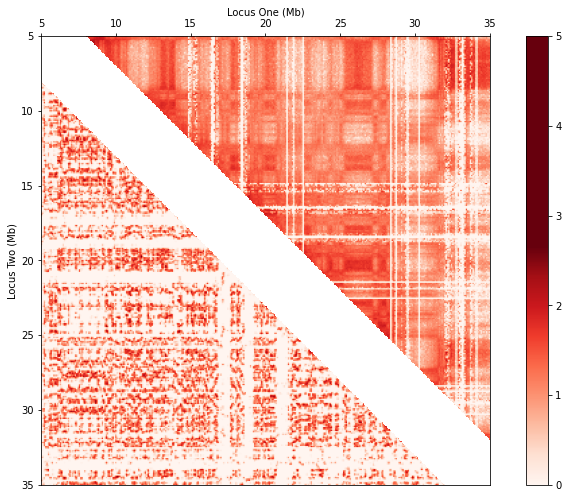

In [16]:
# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_1_upper_part, cmap="Reds", extent=extents)
im = ax.imshow(cmap_1_lower_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_1))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_1)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

In [17]:
# Correlation between coarse-grained cmap and reference cmap
cmap_1_upper_part_flat = cmap_1_upper_part.flatten()
ref_cmap_1_upper_part_flat = ref_cmap_1_upper_part.flatten()

corr_cg_ref_compartments = np.corrcoef(
    cmap_1_upper_part_flat[~np.isnan(cmap_1_upper_part_flat)],
    ref_cmap_1_upper_part_flat[~np.isnan(ref_cmap_1_upper_part_flat)]
)[0, 1]

print(round(corr_cg_ref_compartments, 3))

0.025


#### Refined Simulation

In [18]:
cmap_2_upper = cmap_2_lower_scaled.T
frac_dist = 0.1
dist = int(frac_dist * cmap_2_upper.shape[0])

In [19]:
cmap_2_upper_part = cmap_2_upper.copy()
ref_cmap_2_upper_part = ref_cmap_2.copy()

for i in range(cmap_2_upper.shape[0]):
    for j in range(min(i+dist, cmap_2_upper.shape[0])):
        cmap_2_upper_part[i, j] = np.nan
        ref_cmap_2_upper_part[i, j] = np.nan

cmap_2_lower_part = cmap_2_upper_part.T

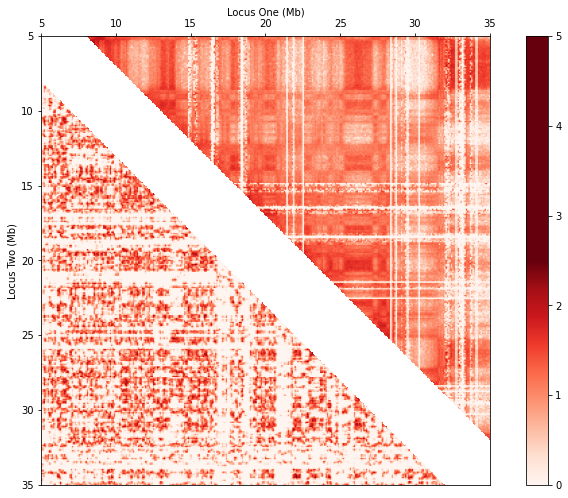

In [20]:
# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_2_upper_part, cmap="Reds", extent=extents)
im = ax.imshow(cmap_2_lower_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_2))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_2)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

In [21]:
# Correlation between coarse-grained cmap and reference cmap
cmap_2_upper_part_flat = cmap_2_upper_part.flatten()
ref_cmap_2_upper_part_flat = ref_cmap_2_upper_part.flatten()

corr_refined_ref_compartments = np.corrcoef(
    cmap_2_upper_part_flat[~np.isnan(cmap_2_upper_part_flat)],
    ref_cmap_2_upper_part_flat[~np.isnan(ref_cmap_2_upper_part_flat)]
)[0, 1]

print(round(corr_refined_ref_compartments, 3))

0.023


### Isolate Points Close to the Main Diagonal

#### Coarse-grained Simulation

In [22]:
cmap_1_upper = cmap_1_lower_scaled.T
frac_dist = 0.1
dist = int(frac_dist * cmap_1_upper.shape[0])

In [23]:
cmap_1_upper_part = cmap_1_upper.copy()
ref_cmap_1_upper_part = ref_cmap_upper_1.copy()

for i in range(len(cmap_1_upper_part)):
    for j in range(i):
        cmap_1_upper_part[i, j] = np.nan
        ref_cmap_1_upper_part[i, j] = np.nan

for i in range(cmap_1_upper.shape[0]):
    for j in range(min(i+dist, cmap_1_upper.shape[0]), cmap_1_upper.shape[0]):
        cmap_1_upper_part[i, j] = np.nan
        ref_cmap_1_upper_part[i, j] = np.nan

cmap_1_lower_part = cmap_1_upper_part.T

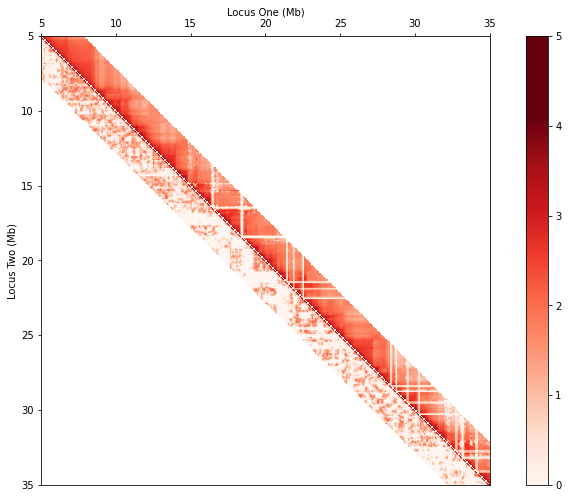

In [24]:
# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_1_upper_part, cmap="Reds", extent=extents)
im = ax.imshow(cmap_1_lower_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_1))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_1)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

In [25]:
# Correlation between coarse-grained cmap and reference cmap
cmap_1_upper_part_flat = cmap_1_upper_part.flatten()
ref_cmap_1_upper_part_flat = ref_cmap_1_upper_part.flatten()

corr_cg_ref_compartments = np.corrcoef(
    cmap_1_upper_part_flat[~np.isnan(cmap_1_upper_part_flat)],
    ref_cmap_1_upper_part_flat[~np.isnan(ref_cmap_1_upper_part_flat)]
)[0, 1]

print(round(corr_cg_ref_compartments, 3))

0.417


#### Refined Simulation

In [26]:
cmap_2_upper = cmap_2_lower_scaled.T
frac_dist = 0.1
dist = int(frac_dist * cmap_2_upper.shape[0])

In [27]:
cmap_2_upper_part = cmap_2_upper.copy()
ref_cmap_2_upper_part = ref_cmap_upper_2.copy()

for i in range(len(cmap_2_upper_part)):
    for j in range(i):
        cmap_2_upper_part[i, j] = np.nan
        ref_cmap_2_upper_part[i, j] = np.nan

for i in range(cmap_2_upper.shape[0]):
    for j in range(min(i+dist, cmap_2_upper.shape[0]), cmap_2_upper.shape[0]):
        cmap_2_upper_part[i, j] = np.nan
        ref_cmap_2_upper_part[i, j] = np.nan

cmap_2_lower_part = cmap_2_upper_part.T

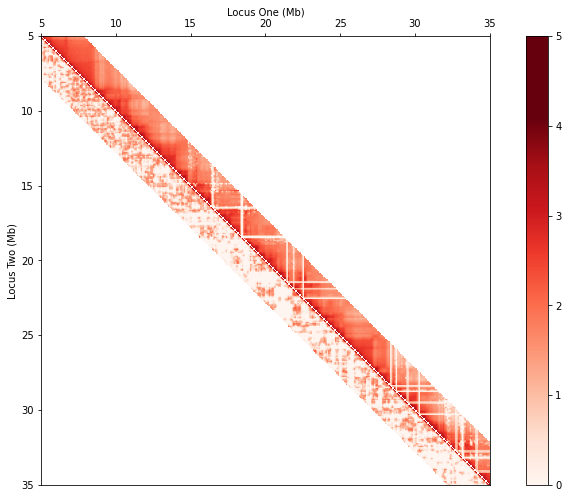

In [28]:
# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_2_upper_part, cmap="Reds", extent=extents)
im = ax.imshow(cmap_2_lower_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_2))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_2)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

In [29]:
# Correlation between coarse-grained cmap and reference cmap
cmap_2_upper_part_flat = cmap_2_upper_part.flatten()
ref_cmap_2_upper_part_flat = ref_cmap_2_upper_part.flatten()

corr_refined_ref_compartments = np.corrcoef(
    cmap_2_upper_part_flat[~np.isnan(cmap_2_upper_part_flat)],
    ref_cmap_2_upper_part_flat[~np.isnan(ref_cmap_2_upper_part_flat)]
)[0, 1]

print(round(corr_refined_ref_compartments, 3))

0.42


### Check Work

Plot what is being used to calculate the Pearson correlation coefficient

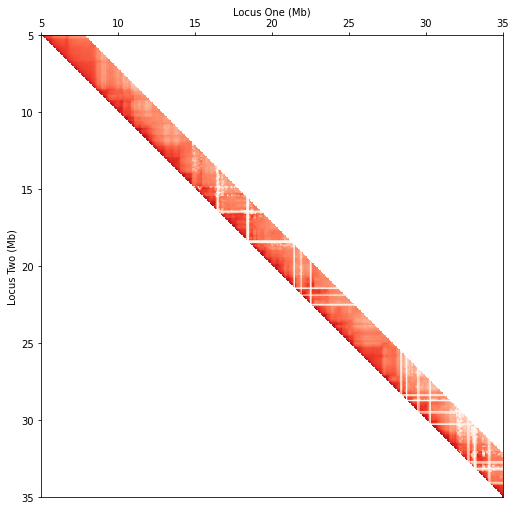

[[3.69250157 3.26652545 2.73899841 ...        nan        nan        nan]
 [       nan 3.69063701 3.10257236 ...        nan        nan        nan]
 [       nan        nan 3.86529709 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 3.96889757 3.26576939 2.97590185]
 [       nan        nan        nan ...        nan 3.86452796 3.28685945]
 [       nan        nan        nan ...        nan        nan 3.80393067]]


In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_1_upper_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_1))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_1)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
cb = fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
cb.remove()
plt.tight_layout()
plt.show()
print(ref_cmap_1_upper_part)

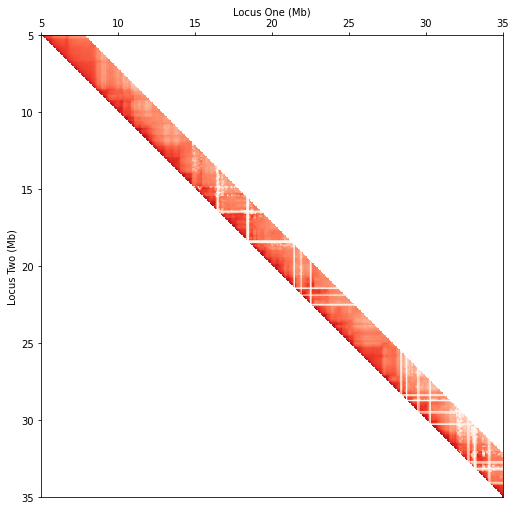

[[3.69250157 3.26652545 2.73899841 ...        nan        nan        nan]
 [       nan 3.69063701 3.10257236 ...        nan        nan        nan]
 [       nan        nan 3.86529709 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 3.96889757 3.26576939 2.97590185]
 [       nan        nan        nan ...        nan 3.86452796 3.28685945]
 [       nan        nan        nan ...        nan        nan 3.80393067]]


In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(ref_cmap_2_upper_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_2))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_2)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
cb = fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
cb.remove()
plt.tight_layout()
plt.show()
print(ref_cmap_2_upper_part)

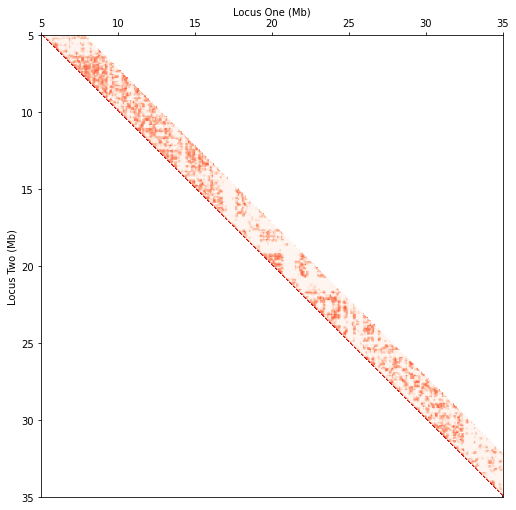

[[3.97760109e+00 2.95580716e+00 1.31731596e-03 ...            nan
             nan            nan]
 [           nan 3.98623865e+00 2.99485113e+00 ...            nan
             nan            nan]
 [           nan            nan 4.00954066e+00 ...            nan
             nan            nan]
 ...
 [           nan            nan            nan ... 3.98677490e+00
  3.00219676e+00 5.73021587e-01]
 [           nan            nan            nan ...            nan
  3.99576549e+00 2.99139746e+00]
 [           nan            nan            nan ...            nan
             nan 3.97116445e+00]]


In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(cmap_1_upper_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_1))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_1)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
cb = fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
cb.remove()
plt.tight_layout()
plt.show()
print(cmap_1_upper_part)

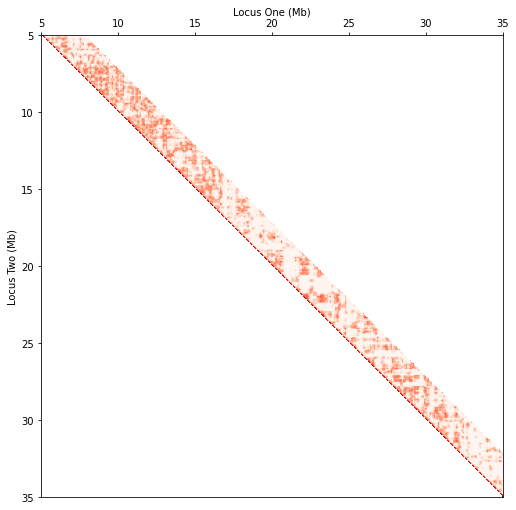

[[4.00770219 3.01938193 0.08189244 ...        nan        nan        nan]
 [       nan 4.03531102 3.02675588 ...        nan        nan        nan]
 [       nan        nan 4.04050544 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 4.01379901 3.02683651 0.34093988]
 [       nan        nan        nan ...        nan 4.01541098 3.01958685]
 [       nan        nan        nan ...        nan        nan 4.02134099]]


In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(cmap_2_upper_part, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(np.max(ref_cmap_1))+1)
boundaries = np.linspace(0, np.ceil(np.max(ref_cmap_1)), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
cb = fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
cb.remove()
plt.tight_layout()
plt.show()
print(cmap_2_upper_part)